# Análise de dados sobre peso corporal 

Objetivo: Análise exploratória usando técnicas de visualização computacional de uma base de dados
utilizando as técnicas estudadas até a Aula 06.

## **Douglas Decicino de Andrade, Nº USP 10883512**

Bacharelado em Estatística e Ciência de Dados

email: douglasdecicino@usp.br

github: https://github.com/decicino


## **Renan de Oliveira da Cruz, Nº USP 10801090**

Bacharelado em Estatística e Ciência de Dados

email: r_oliveira@usp.br

github: https://github.com/nan-oliveira

## **Renan Silva Chun, Nº USP 10691817**

Bacharelado em Estatística e Ciência de Dados

email: rechun@usp.br

github: https://github.com/Rechun1

Abaixo temos os imports de algumas bibliotecas que serão utilizadas no decorrer desse notebook.

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm 

Na célula abaixo temos a leitura dos dados que serão utilizados nesse trabalho.

In [2]:
data = arff.loadarff('ObesityDataSet_raw_and_data_sinthetic.arff')
df = pd.DataFrame(data[0])
df.shape

(2111, 17)

O dataset encontrado em https://www.kaggle.com/mpwolke/obesity-levels-life-style/log. Trata-se de um conjunto de dados referente à situação corporal, separando nos seguintes níveis: abaixo do peso, peso normal, sobrepeso I, sobrepeso II, obesidade I, obesidade II e obesidade III. O conjunto de dados também contém diversos atributos - categóricos e numéricos - a fim de explicar a referida classe corporal das pessoas.

Os atributos relacionados aos hábitos alimentares são: Consumo frequente de alimentos hipercalóricos (FAVC), Frequência de consumo de vegetais (FCVC), Número de refeições principais (NCP), Consumo de alimentos entre as refeições (CAEC), Consumo de água diariamente (CH20), e Consumo de álcool (CALC). Os atributos relacionados à condição física são: Monitoramento do consumo de calorias (SCC), Frequência de atividade física (FAF), Tempo de uso de aparelhos de tecnologia (TUE) e Transporte utilizado (MTRANS). Outras variáveis obtidas foram: Sexo, Idade, Altura e Peso.

* Gender: {Female, Male};
* Age: numeric;
* Height: numeric;
* Weight: numeric;
* family_history_with_overweight: {yes, no};
* FAVC: {yes, no};
* FCVC: numeric;
* NCP: numeric;
* CAEC: {no, Sometimes, Frequently, Always};
* SMOKE: {yes, no};
* CH2O: numeric;
* SCC: {yes, no};
* FAF: numeric;
* TUE: numeric;
* CALC: {no, Sometimes, Frequently, Always};
* MTRANS: {Automobile, Motorbike, Bike, Public_Transportation, Walking};
* NObeyesdad: {Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III}.

Por fim, salientamos que, assim como o preconizado, o dataset contém 16 atributos e 1 variável resposta. Assim como ele possui 2111 registros.

### Pré processamento

Nesta seção tem-se o pré processamento do dataset.

In [3]:
df

Gender        Age    Height      Weight  \
0     b'Female'  21.000000  1.620000   64.000000   
1     b'Female'  21.000000  1.520000   56.000000   
2       b'Male'  23.000000  1.800000   77.000000   
3       b'Male'  27.000000  1.800000   87.000000   
4       b'Male'  22.000000  1.780000   89.800000   
...         ...        ...       ...         ...   
2106  b'Female'  20.976842  1.710730  131.408528   
2107  b'Female'  21.982942  1.748584  133.742943   
2108  b'Female'  22.524036  1.752206  133.689352   
2109  b'Female'  24.361936  1.739450  133.346641   
2110  b'Female'  23.664709  1.738836  133.472641   

     family_history_with_overweight    FAVC  FCVC  NCP          CAEC   SMOKE  \
0                            b'yes'   b'no'   2.0  3.0  b'Sometimes'   b'no'   
1                            b'yes'   b'no'   3.0  3.0  b'Sometimes'  b'yes'   
2                            b'yes'   b'no'   2.0  3.0  b'Sometimes'   b'no'   
3                             b'no'   b'no'   3.0  3.0  b'Sometimes'   b'no'   
4                             b'no'   b'no'   2.0  1.0  b'Sometimes'   b'no'   
...                             ...     ...   ...  ...           ...     ...   
2106                         b'yes'  b'yes'   3.0  3.0  b'Sometimes'   b'no'   
2107                         b'yes'  b'yes'   3.0  3.0  b'Sometimes'   b'no'   
2108                         b'yes'  b'yes'   3.0  3.0  b'Sometimes'   b'no'   
2109                         b'yes'  b'yes'   3.0  3.0  b'Sometimes'   b'no'   
2110                         b'yes'  b'yes'   3.0  3.0  b'Sometimes'   b'no'   

          CH2O     SCC       FAF       TUE           CALC  \
0     2.000000   b'no'  0.000000  1.000000          b'no'   
1     3.000000  b'yes'  3.000000  0.000000   b'Sometimes'   
2     2.000000   b'no'  2.000000  1.000000  b'Frequently'   
3     2.000000   b'no'  2.000000  0.000000  b'Frequently'   
4     2.000000   b'no'  0.000000  0.000000   b'Sometimes'   
...        ...     ...       ...       ...            ...   
2106  1.728139   b'no'  1.676269  0.906247   b'Sometimes'   
2107  2.005130   b'no'  1.341390  0.599270   b'Sometimes'   
2108  2.054193   b'no'  1.414209  0.646288   b'Sometimes'   
2109  2.852339   b'no'  1.139107  0.586035   b'Sometimes'   
2110  2.863513   b'no'  1.026452  0.714137   b'Sometimes'   

                        MTRANS              NObeyesdad  
0     b'Public_Transportation'        b'Normal_Weight'  
1     b'Public_Transportation'        b'Normal_Weight'  
2     b'Public_Transportation'        b'Normal_Weight'  
3                   b'Walking'   b'Overweight_Level_I'  
4     b'Public_Transportation'  b'Overweight_Level_II'  
...                        ...                     ...  
2106  b'Public_Transportation'     b'Obesity_Type_III'  
2107  b'Public_Transportation'     b'Obesity_Type_III'  
2108  b'Public_Transportation'     b'Obesity_Type_III'  
2109  b'Public_Transportation'     b'Obesity_Type_III'  
2110  b'Public_Transportation'     b'Obesity_Type_III'  

[2111 rows x 17 columns]

Vamos substituir os caracteres que vieram errados com a letra 'b'.

In [4]:
df['Gender'] = df['Gender'].apply(str).str.replace('b', '')
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(str).str.replace('b', '')
df['FAVC'] = df['FAVC'].apply(str).str.replace('b', '')
df['CAEC'] = df['CAEC'].apply(str).str.replace('b', '')
df['SMOKE'] = df['SMOKE'].apply(str).str.replace('b', '')
df['SCC'] = df['SCC'].apply(str).str.replace('b', '')
df['CALC'] = df['CALC'].apply(str).str.replace('b', '')
df['MTRANS'] = df['MTRANS'].apply(str).str.replace('b', '')
df['NObeyesdad'] = df['NObeyesdad'].apply(str).str.replace('b', '')
df

Gender        Age    Height      Weight  \
0     'Female'  21.000000  1.620000   64.000000   
1     'Female'  21.000000  1.520000   56.000000   
2       'Male'  23.000000  1.800000   77.000000   
3       'Male'  27.000000  1.800000   87.000000   
4       'Male'  22.000000  1.780000   89.800000   
...        ...        ...       ...         ...   
2106  'Female'  20.976842  1.710730  131.408528   
2107  'Female'  21.982942  1.748584  133.742943   
2108  'Female'  22.524036  1.752206  133.689352   
2109  'Female'  24.361936  1.739450  133.346641   
2110  'Female'  23.664709  1.738836  133.472641   

     family_history_with_overweight   FAVC  FCVC  NCP         CAEC  SMOKE  \
0                             'yes'   'no'   2.0  3.0  'Sometimes'   'no'   
1                             'yes'   'no'   3.0  3.0  'Sometimes'  'yes'   
2                             'yes'   'no'   2.0  3.0  'Sometimes'   'no'   
3                              'no'   'no'   3.0  3.0  'Sometimes'   'no'   
4                              'no'   'no'   2.0  1.0  'Sometimes'   'no'   
...                             ...    ...   ...  ...          ...    ...   
2106                          'yes'  'yes'   3.0  3.0  'Sometimes'   'no'   
2107                          'yes'  'yes'   3.0  3.0  'Sometimes'   'no'   
2108                          'yes'  'yes'   3.0  3.0  'Sometimes'   'no'   
2109                          'yes'  'yes'   3.0  3.0  'Sometimes'   'no'   
2110                          'yes'  'yes'   3.0  3.0  'Sometimes'   'no'   

          CH2O    SCC       FAF       TUE          CALC  \
0     2.000000   'no'  0.000000  1.000000          'no'   
1     3.000000  'yes'  3.000000  0.000000   'Sometimes'   
2     2.000000   'no'  2.000000  1.000000  'Frequently'   
3     2.000000   'no'  2.000000  0.000000  'Frequently'   
4     2.000000   'no'  0.000000  0.000000   'Sometimes'   
...        ...    ...       ...       ...           ...   
2106  1.728139   'no'  1.676269  0.906247   'Sometimes'   
2107  2.005130   'no'  1.341390  0.599270   'Sometimes'   
2108  2.054193   'no'  1.414209  0.646288   'Sometimes'   
2109  2.852339   'no'  1.139107  0.586035   'Sometimes'   
2110  2.863513   'no'  1.026452  0.714137   'Sometimes'   

                      MTRANS             NObeyesdad  
0     'Pulic_Transportation'        'Normal_Weight'  
1     'Pulic_Transportation'        'Normal_Weight'  
2     'Pulic_Transportation'        'Normal_Weight'  
3                  'Walking'   'Overweight_Level_I'  
4     'Pulic_Transportation'  'Overweight_Level_II'  
...                      ...                    ...  
2106  'Pulic_Transportation'      'Oesity_Type_III'  
2107  'Pulic_Transportation'      'Oesity_Type_III'  
2108  'Pulic_Transportation'      'Oesity_Type_III'  
2109  'Pulic_Transportation'      'Oesity_Type_III'  
2110  'Pulic_Transportation'      'Oesity_Type_III'  

[2111 rows x 17 columns]

Vamos, agora, remover as aspas simples das palavras.

In [5]:
df['Gender'] = df['Gender'].apply(str).str.replace("'", '')
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(str).str.replace("'", '')
df['FAVC'] = df['FAVC'].apply(str).str.replace("'", '')
df['CAEC'] = df['CAEC'].apply(str).str.replace("'", '')
df['SMOKE'] = df['SMOKE'].apply(str).str.replace("'", '')
df['SCC'] = df['SCC'].apply(str).str.replace("'", '')
df['CALC'] = df['CALC'].apply(str).str.replace("'", '')
df['MTRANS'] = df['MTRANS'].apply(str).str.replace("'", '')
df['NObeyesdad'] = df['NObeyesdad'].apply(str).str.replace("'", '')
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                MTRANS           NObeyesdad  
0             no  Pulic_Transportation        Normal_Weight  
1      Sometimes  Pulic_Transportation        Normal_Weight  
2     Frequently  Pulic_Transportation        Normal_Weight  
3     Frequently               Walking   Overweight_Level_I  
4      Sometimes  Pulic_Transportation  Overweight_Level_II  
...          ...                   ...                  ...  
2106   Sometimes  Pulic_Transportation      Oesity_Type_III  
2107   Sometimes  Pulic_Transportation      Oesity_Type_III  
2108   Sometimes  Pulic_Transportation      Oesity_Type_III  
2109   Sometimes  Pulic_Transportation      Oesity_Type_III  
2110   Sometimes  Pulic_Transportation      Oesity_Type_III  

[2111 rows x 17 columns]

Checando se existe a preseça de valores faltantes.

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

O dataset não contém valores faltantes.

In [7]:
df['NObeyesdad'].value_counts()

Oesity_Type_I          351
Oesity_Type_III        324
Oesity_Type_II         297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

Como visto acima, a variável resposta contém 7 classes diferentes. Para termos resultados visuais mais satisfatórios decidimos concatenar determinadas classes a fim de obter-se uma variável dependente com menos labels. Em razão disso, aplicamos a seguinte transformação:

* Oesity_Type_I, Oesity_Type_II e Oesity_Type_III passam a ser Obesity;
* Overweight_Level_I e Overweight_Level_II passam a ser Overweight;
* Normal_Weight e Insufficient_Weight não foram modificados.

In [8]:
df["NObeyesdad"].replace({"Oesity_Type_I": "Obesity", "Oesity_Type_II": "Obesity","Oesity_Type_III": "Obesity",
                          "Overweight_Level_I": "Overweight","Overweight_Level_II": "Overweight"}, inplace=True)

In [9]:
df['NObeyesdad'].value_counts()

Obesity                972
Overweight             580
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

Ressaltamos que essa tranformação deixa a variável resposta desbalanceada. Todavia, como a princípio o nosso objetico principal nesse projeto não é a classificação não nos preocuparamos com isso.

In [10]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                MTRANS     NObeyesdad  
0             no  Pulic_Transportation  Normal_Weight  
1      Sometimes  Pulic_Transportation  Normal_Weight  
2     Frequently  Pulic_Transportation  Normal_Weight  
3     Frequently               Walking     Overweight  
4      Sometimes  Pulic_Transportation     Overweight  
...          ...                   ...            ...  
2106   Sometimes  Pulic_Transportation        Obesity  
2107   Sometimes  Pulic_Transportation        Obesity  
2108   Sometimes  Pulic_Transportation        Obesity  
2109   Sometimes  Pulic_Transportation        Obesity  
2110   Sometimes  Pulic_Transportation        Obesity  

[2111 rows x 17 columns]

### Vamos agora selecionar as 5 variáveis mais importantes.

In [11]:
df_chart = df.iloc[:,[1,2,3,6,7,10,12,13,16]]
X_numeric = np.array(df_chart.iloc[:,:-1])

In [12]:
y = np.array(df_chart.iloc[:,-1])

#### Selecionando as top 5 features.

A escolha das 5 principais covariáveis será dada com base na medida qui-quadrado.

In [13]:
KBest = SelectKBest(chi2, k = 5).fit(X_numeric, y) 

In [14]:
list(KBest.get_support(1))

[0, 2, 4, 6, 7]

In [15]:
df_chart_selec = df_chart.iloc[:,[0, 2, 4, 6, 7,-1]]
df_chart_selec

Age      Weight  NCP       FAF       TUE     NObeyesdad
0     21.000000   64.000000  3.0  0.000000  1.000000  Normal_Weight
1     21.000000   56.000000  3.0  3.000000  0.000000  Normal_Weight
2     23.000000   77.000000  3.0  2.000000  1.000000  Normal_Weight
3     27.000000   87.000000  3.0  2.000000  0.000000     Overweight
4     22.000000   89.800000  1.0  0.000000  0.000000     Overweight
...         ...         ...  ...       ...       ...            ...
2106  20.976842  131.408528  3.0  1.676269  0.906247        Obesity
2107  21.982942  133.742943  3.0  1.341390  0.599270        Obesity
2108  22.524036  133.689352  3.0  1.414209  0.646288        Obesity
2109  24.361936  133.346641  3.0  1.139107  0.586035        Obesity
2110  23.664709  133.472641  3.0  1.026452  0.714137        Obesity

[2111 rows x 6 columns]

As top 5 features selecionadas de acordo com o método Select K Best, com função Qui-quadrado foram `Age`, `Weight`, `FCVC`, `NCP` e `FAF`.

### Scatterplots

Abaixo realizamos apenas com essas 5 principais covariáveis.

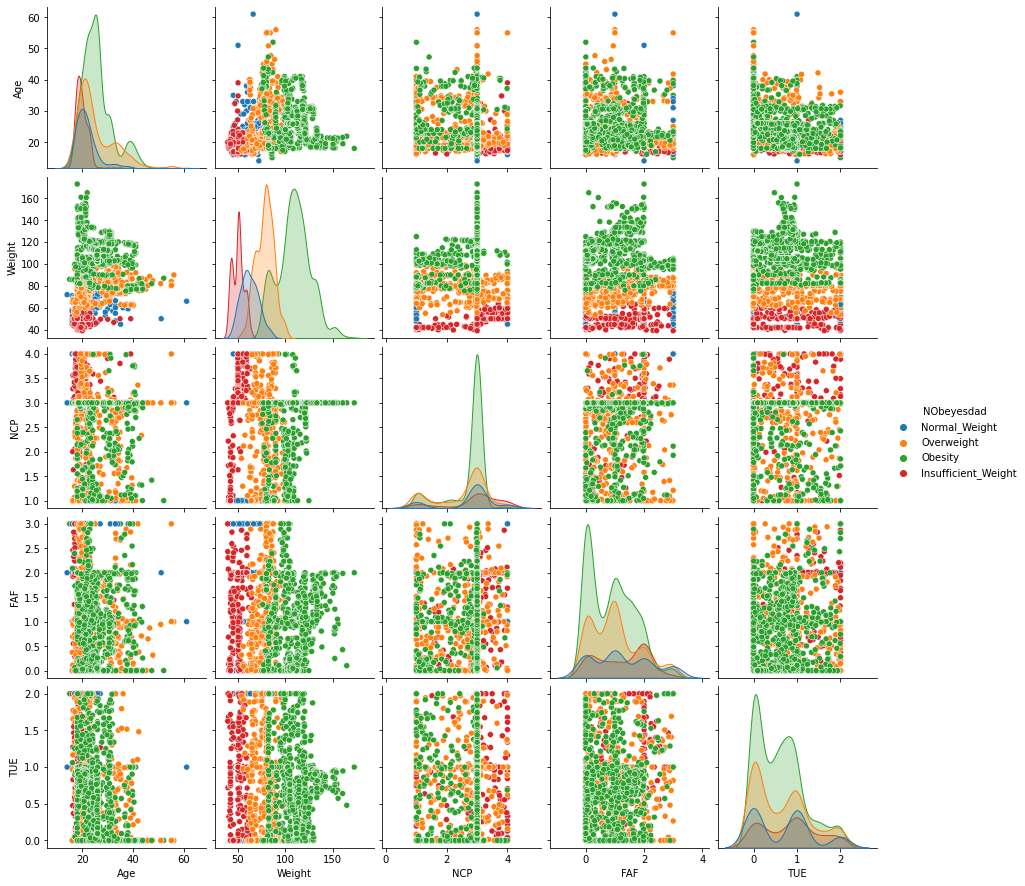

In [16]:
sns.pairplot(df_chart_selec, hue = 'NObeyesdad')
plt.show()

Nos gráficos de dispersão acima, podemos ver que nenhum apresenta uma evidente correlação linear. Ainda, em cada um dos gráficos podemos perceber que os dados de cada uma das classes (Normal_Weight, Overweight, Obesity e Insufficient_Weight) figuram-se relativamente próximos.

Em relação aos gráficos referentes às estivativas da densidade de cada um dos atributos situados na diagonal principal, podemos notar que o atributo `Weight` apresenta uma densidade bem discrepante quando estratificado pelas classes da variável reposta. Por exemplo, os registro ligados a classe `Obesity` distribuem-se mais direita do que os demais, enquanto que os registro ligados a classe `Insufficient_Weight` mais a esquerda.  

### K means

In [17]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_chart.iloc[:,:-1])
    distortions.append(kmeanModel.inertia_)

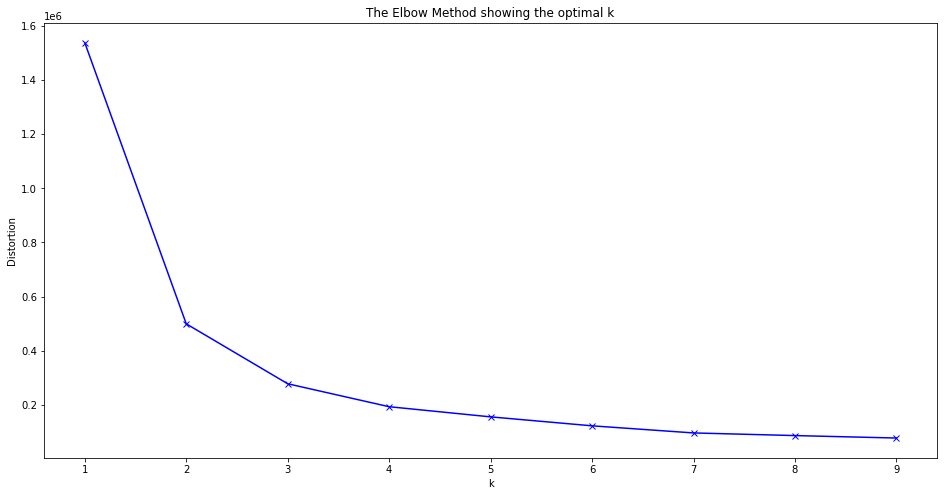

In [18]:
plt.figure(figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Vamos realizar o agrupamento particional K-Means com 4 clusters. O motivo dos 4 clusters é devido a nossa variável resposta apresentar 4 classes diferentes. Além disso, conforme o Elbow Plot acima a partir de 4 clusters a métrica Distortion não apresenta uma queda significativa. 

Obs: o score distortion é calculada com a soma das distâncias ao quadrado de cada ponto até seu centro atribuído.

In [19]:
kmeans = KMeans(n_clusters = 4, n_init = 10, init = 'k-means++', max_iter = 500)
kmeans.fit(df_chart.iloc[:, :-1])
df_chart['Clusters'] = kmeans.labels_
df_chart

<ipython-input-19-e1a50a2b6f11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chart['Clusters'] = kmeans.labels_


Age    Height      Weight  FCVC  NCP      CH2O       FAF  \
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000   
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000   
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000   
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000   
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000   
...         ...       ...         ...   ...  ...       ...       ...   
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269   
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390   
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209   
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107   
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452   

           TUE     NObeyesdad  Clusters  
0     1.000000  Normal_Weight         1  
1     0.000000  Normal_Weight         1  
2     1.000000  Normal_Weight         2  
3     0.000000     Overweight         2  
4     0.000000     Overweight         2  
...        ...            ...       ...  
2106  0.906247        Obesity         3  
2107  0.599270        Obesity         3  
2108  0.646288        Obesity         3  
2109  0.586035        Obesity         3  
2110  0.714137        Obesity         3  

[2111 rows x 10 columns]

Vamos agora aplicar coordenadas paralelas nos dados colocando a cor com base nos clusters.

In [20]:
fig = px.parallel_coordinates(df_chart.drop(['NObeyesdad'], axis=1),
                              color = "Clusters",
                              title = "Coordenadas paralelas - Cor com base nos Clusters")
fig.show()

Mediante o gráfico acima, podemos notar que os registros do cluster amarelo são os que apresentam menor idade e tanto altura quanto peso relativamente medianos.

Ademais, não podemos concluir a presença de uma correlação fortemente positiva entre nenhuma das covariáveis, visto que, as retas entre os atributos não se mostram paralelas em nenhum dos casos.

Vamos agora aplicar coordenadas paralelas nos dados colocando a cor com base na variável resposta.

In [21]:
df_chart_aux = df_chart.copy()
df_chart_aux["NObeyesdad"].replace({"Insufficient_Weight": 0,
                                    "Normal_Weight": 1,
                                    "Overweight": 2,
                                    "Obesity": 3},
                               inplace = True)
fig = px.parallel_coordinates(df_chart_aux.drop(['Clusters'], axis=1),
                              color = "NObeyesdad",
                              title = "Coordenadas paralelas - Cor com base na variável resposta")
fig.show()

Os gráficos de coordenadas paralelas apresentam uma certa discrepância. Isso é um indicativo de que a clusterização não tenha funcionado tão bem.

### Coordenadas paralelas com variáveis caregoricas.

In [22]:
df_chart2 = df.iloc[:,[4,5,8,9,11,14,15,16]]
df_chart2['Clusters'] = kmeans.labels_
df_chart2 = df_chart2.drop(['NObeyesdad'], axis=1)

<ipython-input-22-5a199daef8e9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_chart2

family_history_with_overweight FAVC       CAEC SMOKE  SCC        CALC  \
0                               yes   no  Sometimes    no   no          no   
1                               yes   no  Sometimes   yes  yes   Sometimes   
2                               yes   no  Sometimes    no   no  Frequently   
3                                no   no  Sometimes    no   no  Frequently   
4                                no   no  Sometimes    no   no   Sometimes   
...                             ...  ...        ...   ...  ...         ...   
2106                            yes  yes  Sometimes    no   no   Sometimes   
2107                            yes  yes  Sometimes    no   no   Sometimes   
2108                            yes  yes  Sometimes    no   no   Sometimes   
2109                            yes  yes  Sometimes    no   no   Sometimes   
2110                            yes  yes  Sometimes    no   no   Sometimes   

                    MTRANS  Clusters  
0     Pulic_Transportation         1  
1     Pulic_Transportation         1  
2     Pulic_Transportation         2  
3                  Walking         2  
4     Pulic_Transportation         2  
...                    ...       ...  
2106  Pulic_Transportation         3  
2107  Pulic_Transportation         3  
2108  Pulic_Transportation         3  
2109  Pulic_Transportation         3  
2110  Pulic_Transportation         3  

[2111 rows x 8 columns]

In [24]:
fig2 = px.parallel_categories(df_chart2, color = "Clusters")
fig2.show()

Não faremos a comparação feita anteriorme (Coordenadas paralelas com Cluster vs. Variável Resposta) porque a clusterização foi feita apenas para os dados numéricos. 

A partir do gráfico acima notamos que os atributos categóricos estão bem desbalanceados. Ainda, percebemos que grande parte das pessoas não fumam. Assim como a maioria não monitora o consumo de calorias.

### KNNG

#### Valores de K e variações dos grafos

Vamos primeiramente criar uma lista de valores de k para podermos testar com cada um deles

In [25]:
df_chart_knng = df_chart.copy()
df_chart_knng.drop(columns = "NObeyesdad", inplace = True)
df_chart_knng

Age    Height      Weight  FCVC  NCP      CH2O       FAF  \
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000   
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000   
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000   
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000   
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000   
...         ...       ...         ...   ...  ...       ...       ...   
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269   
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390   
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209   
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107   
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452   

           TUE  Clusters  
0     1.000000         1  
1     0.000000         1  
2     1.000000         2  
3     0.000000         2  
4     0.000000         2  
...        ...       ...  
2106  0.906247         3  
2107  0.599270         3  
2108  0.646288         3  
2109  0.586035         3  
2110  0.714137         3  

[2111 rows x 9 columns]

In [26]:
k = [3,5,7,10,13,15,17,20,25,50,100]

Agora, vamos utilizar a função abaixo para calcular um grafo para cada valor de k da lista

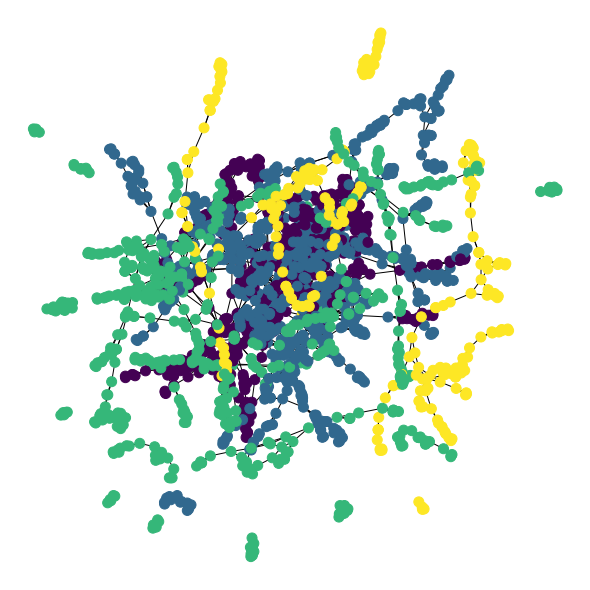

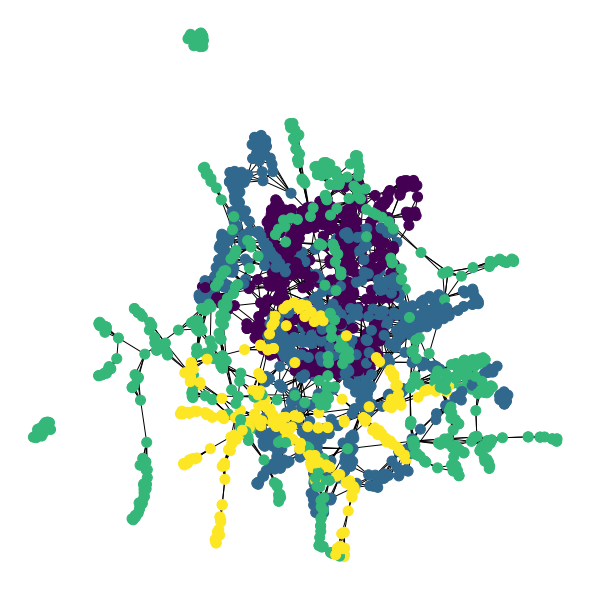

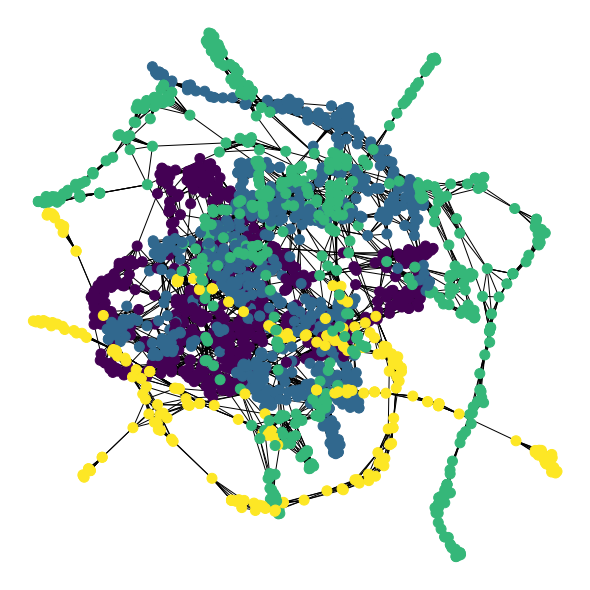

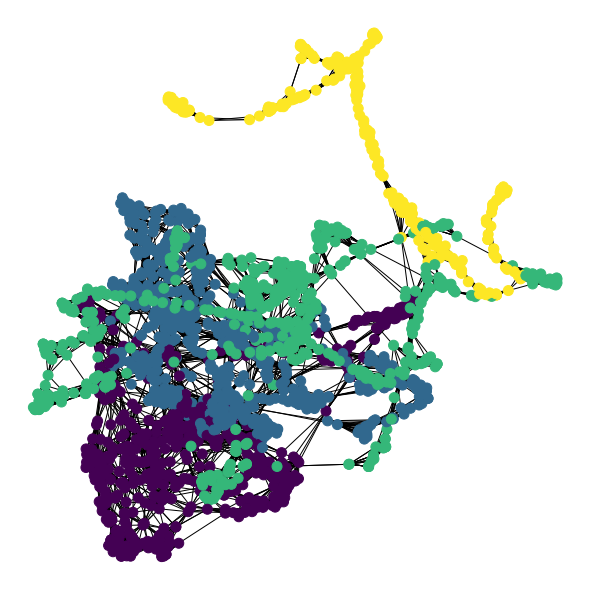

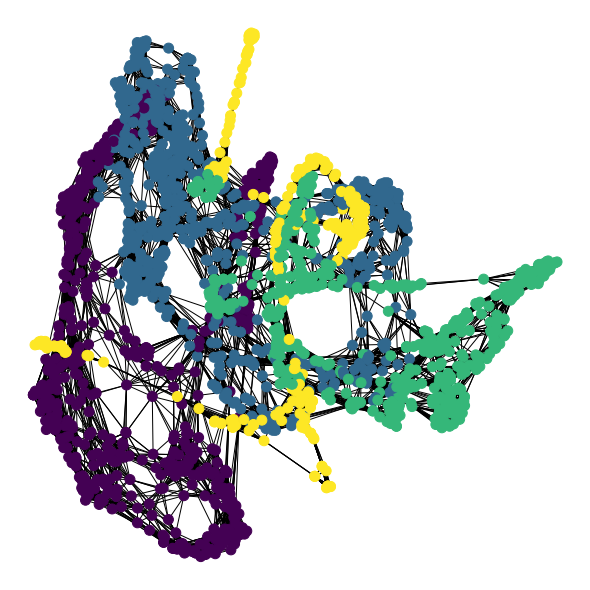

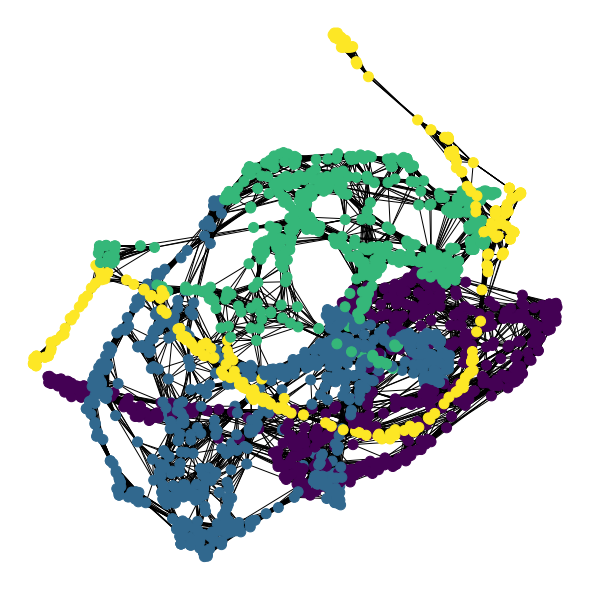

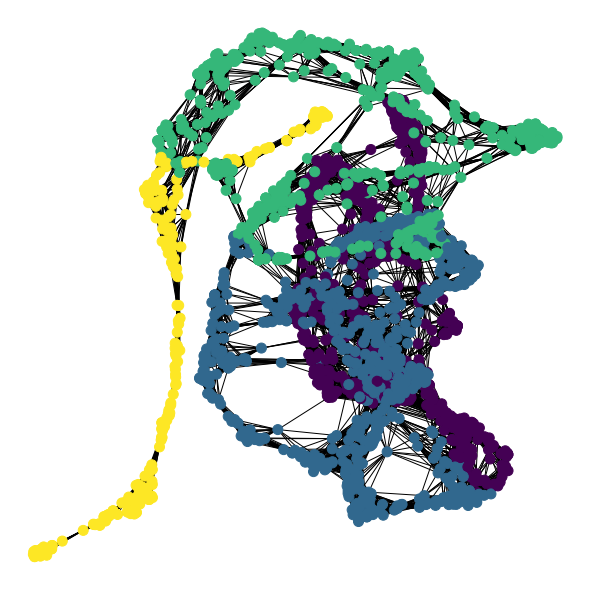

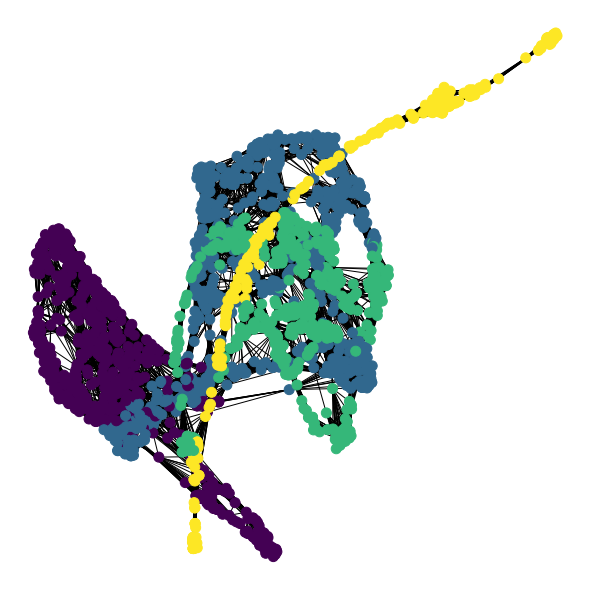

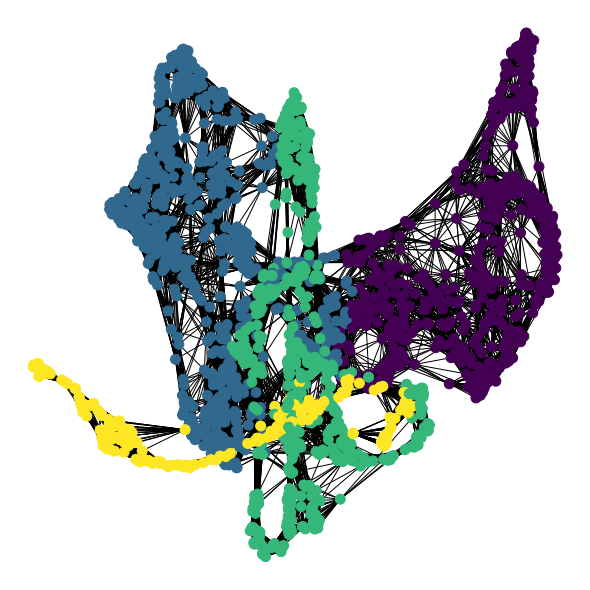

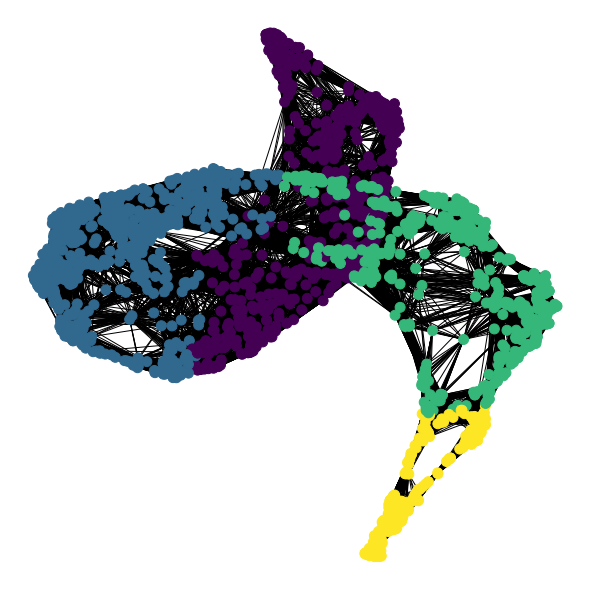

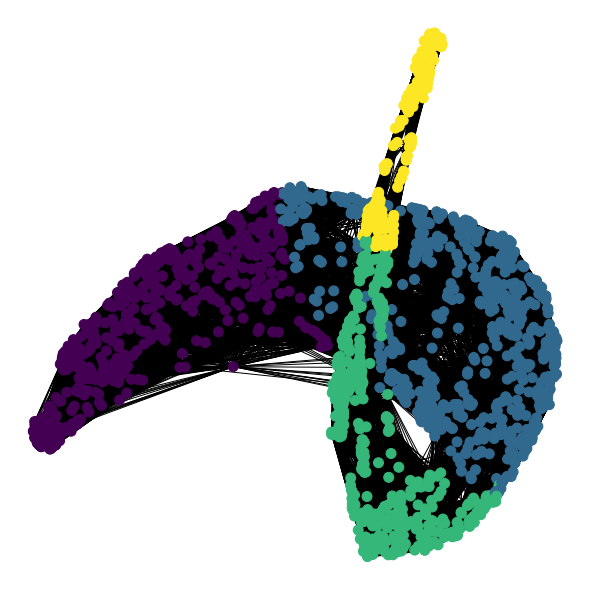

In [27]:
X = np.array(df_chart_knng)
for i in k:
    A = kneighbors_graph(df_chart_knng.iloc[:,:-1], n_neighbors=i, metric="euclidean")
    G = nx.Graph(A)
    color_code = {}
    colors = []
    for v in list(df_chart_knng['Clusters']):
        if v not in color_code: color_code[v] = len(color_code)
        colors.append(color_code[v])
    plt.figure(figsize=(8,8)) 
    nx.draw(G, node_size=100, pos=nx.spring_layout(G), node_color=colors)

Como podemos ver, conforme vamos aumentando o valor de k, o grafo tende a ficar cada vez mais concentrado em um local, diminuindo a separação. Quando pegamos o valor de k=3, temos uma estrutura mais separada, porém de forma aleatória, sem um padrão de divisão. Conforme vamos aumentando o valor de k, podemos ver que o grafo vai cada vez ficando mais 'agrupado' chegando em k=10, que é o valor que aparentemente oferece uma separação melhor dos dados. Após isso, para valores maiores, podemos perceber um aglomerado cada vez maior.

### REDES SOM

Vamos, agora, à construção do gráfico de Redes Som.

In [28]:
Y_train = df.loc[:,'NObeyesdad'].values
X_train = (df_chart.iloc[:, :-2])

Fazendo alguns tratamentos.

In [29]:
label = LabelEncoder()
Y_train = label.fit_transform(Y_train)

In [30]:
normal_sc = MinMaxScaler(feature_range = (0,1))
X_train = normal_sc.fit_transform(X_train)

In [31]:
som = MiniSom(x = 10, y = 10, input_len = 8, sigma = 3.0, learning_rate = 0.5)
som.random_weights_init(X_train)
som.train_random(data = X_train, num_iteration = 1000)

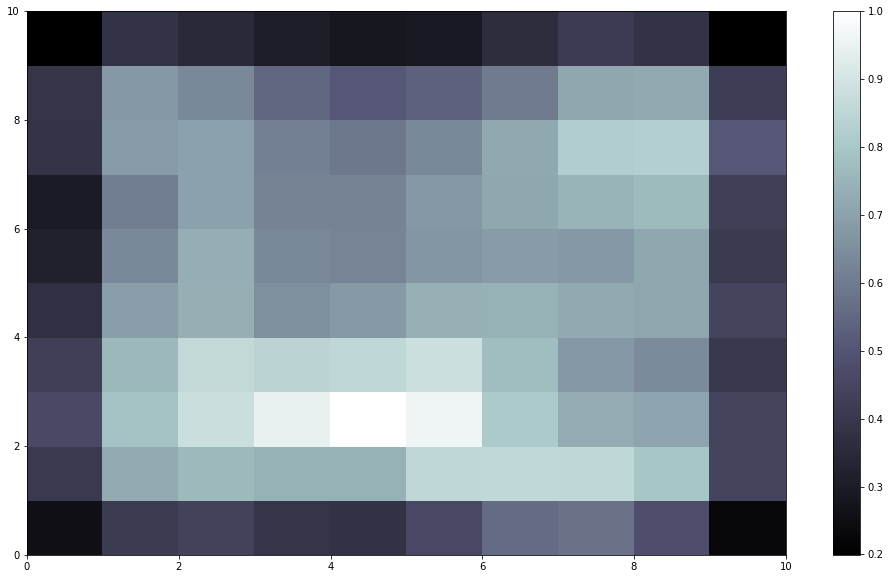

In [32]:
plt.figure(figsize=(17, 10))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
plt.show()

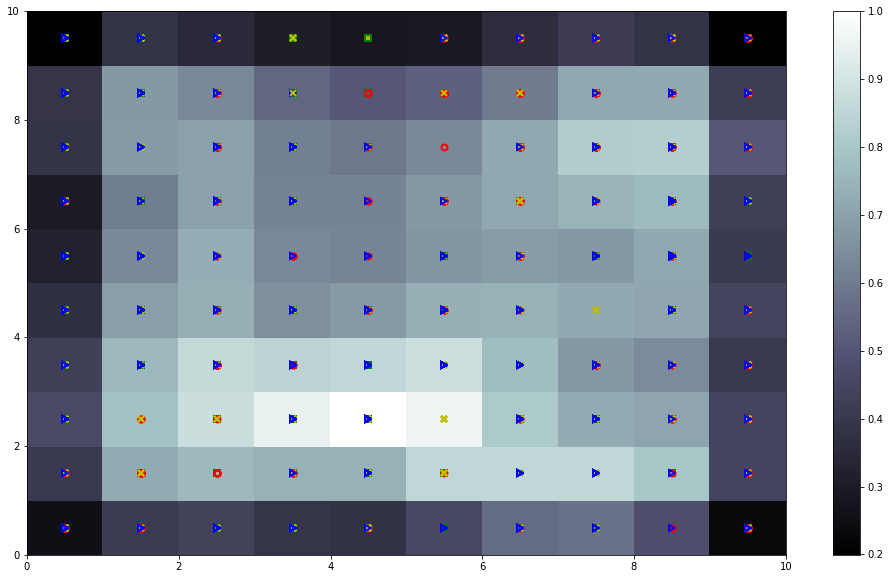

In [33]:
plt.figure(figsize=(17, 10))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
markers = ['o', 's','>','x','a']
colors = ['r', 'g','b','y','p']
for i, x in tqdm(enumerate(X_train)):
    w = som.winner(x)
    plt.plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[Y_train[i]],
         markeredgecolor = colors[Y_train[i]],
         markerfacecolor = 'None',
         markersize = 6,
         markeredgewidth = 2)
    plt.savefig('som_scale_2.png')
plt.show()

Ao considerar os resultados gerados no grid 10 por 10, é possível notar que houve uma grande mistura entre as classes. Para esse caso, tendo um grande numero de neurônios que não aprederam bem separando os valores em suas bordas.

No presente caso não há neurônios "mortos", que não fizeram a representação de nenhuma amostra.

### Principal Component Analysis

In [34]:
df_pca = df.iloc[:,[1,2,3,6,7,10,12,13, 16]]
df_pca.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad'],
      dtype='object')

In [35]:
features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

df_norm = df_pca[features]
df_norm = (df_norm - df_norm.min())/(df_norm.max() - df_norm.min())

pca = PCA(n_components = 2)
components = pca.fit_transform(df_norm)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=df_pca["NObeyesdad"]
    )
fig.update_traces(diagonal_visible=False)
fig.show()

Podemos ver que as duas componentes principais apresentam 43,5% de explicação da matriz de variância e covariância.
Além disso, visualmente é possível perceber que as classes estão todas misturadas.

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

X = df_norm
y = df_pca["NObeyesdad"].values
clf = GaussianNB()
scores_alldata = cross_val_score(clf, X, y, cv = 30, scoring = "accuracy")
X = components.copy()
scores_pca = cross_val_score(clf, X, y, cv = 30, scoring = "accuracy")

In [37]:
print("Média da acurácia com os dados %2.4f" %np.mean(scores_alldata))
print("Média da acurácia com o PCA %2.4f" %np.mean(scores_pca))

Média da acurácia com os dados 0.7534
Média da acurácia com o PCA 0.4778


Como podemos ver,mediante as métricas acima a Análise de Componentes Principais não obteve resultados satisfatórios. Visto que a acurácia média da classificação utilizando todos os dados numéricos é bem superior do que a acurácia da classificação utilizando as duas componentes principais.